<a href="https://colab.research.google.com/github/JoeUzo/Analysis/blob/main/Dr_Semmelweis_Handwashing_Discovery_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context

### Introduction

Dr. Ignaz Semmelweis, a Hungarian physician born in 1818, worked at the Vienna General Hospital. In the past, people believed that illness was caused by "bad air" or evil spirits. However, in the 1800s, doctors began to focus more on anatomy, perform autopsies, and make arguments based on data. Dr. Semmelweis suspected that there were procedural issues at the Vienna General Hospital. He sought to understand why so many women in maternity wards were dying from childbed fever. (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

### The Data Source

Dr Semmelweis published his research in 1861. The scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861) have been found, but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).


### Upgrade plotly (only Google Colab Notebook)

In [ ]:
pip install --upgrade plotly

### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

In [ ]:
print(df_yearly.shape)
print(df_yearly.info())
print(df_yearly)

(12, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes
None
    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [ ]:
print(df_monthly.shape)
print(df_monthly.info())
print(df_monthly.head())

(98, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB
None
        date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2


### Check for Nan Values and Duplicates

In [ ]:
print(df_monthly.isna().values.any())
print(df_yearly.isna().values.any())

False
False


In [ ]:
print(f'Any yearly duplicates? {df_yearly.duplicated().values.any()}')
print(f'Any monthly duplicates? {df_monthly.duplicated().values.any()}')

Any yearly duplicates? False
Any monthly duplicates? False


### Descriptive Statistics

In [ ]:
print(df_yearly.describe())
print(df_monthly.describe())

          year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00
       births  deaths
count   98.00   98.00
mean   267.00   22.47
std     41.77   18.14
min    190.00    0.00
25%    242.50    8.00
50%    264.00   16.50
75%    292.75   36.75
max    406.00   75.00


### Percentage of Women Dying in Childbirth

In [ ]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

###Plot of the Monthly Data on Twin Axes

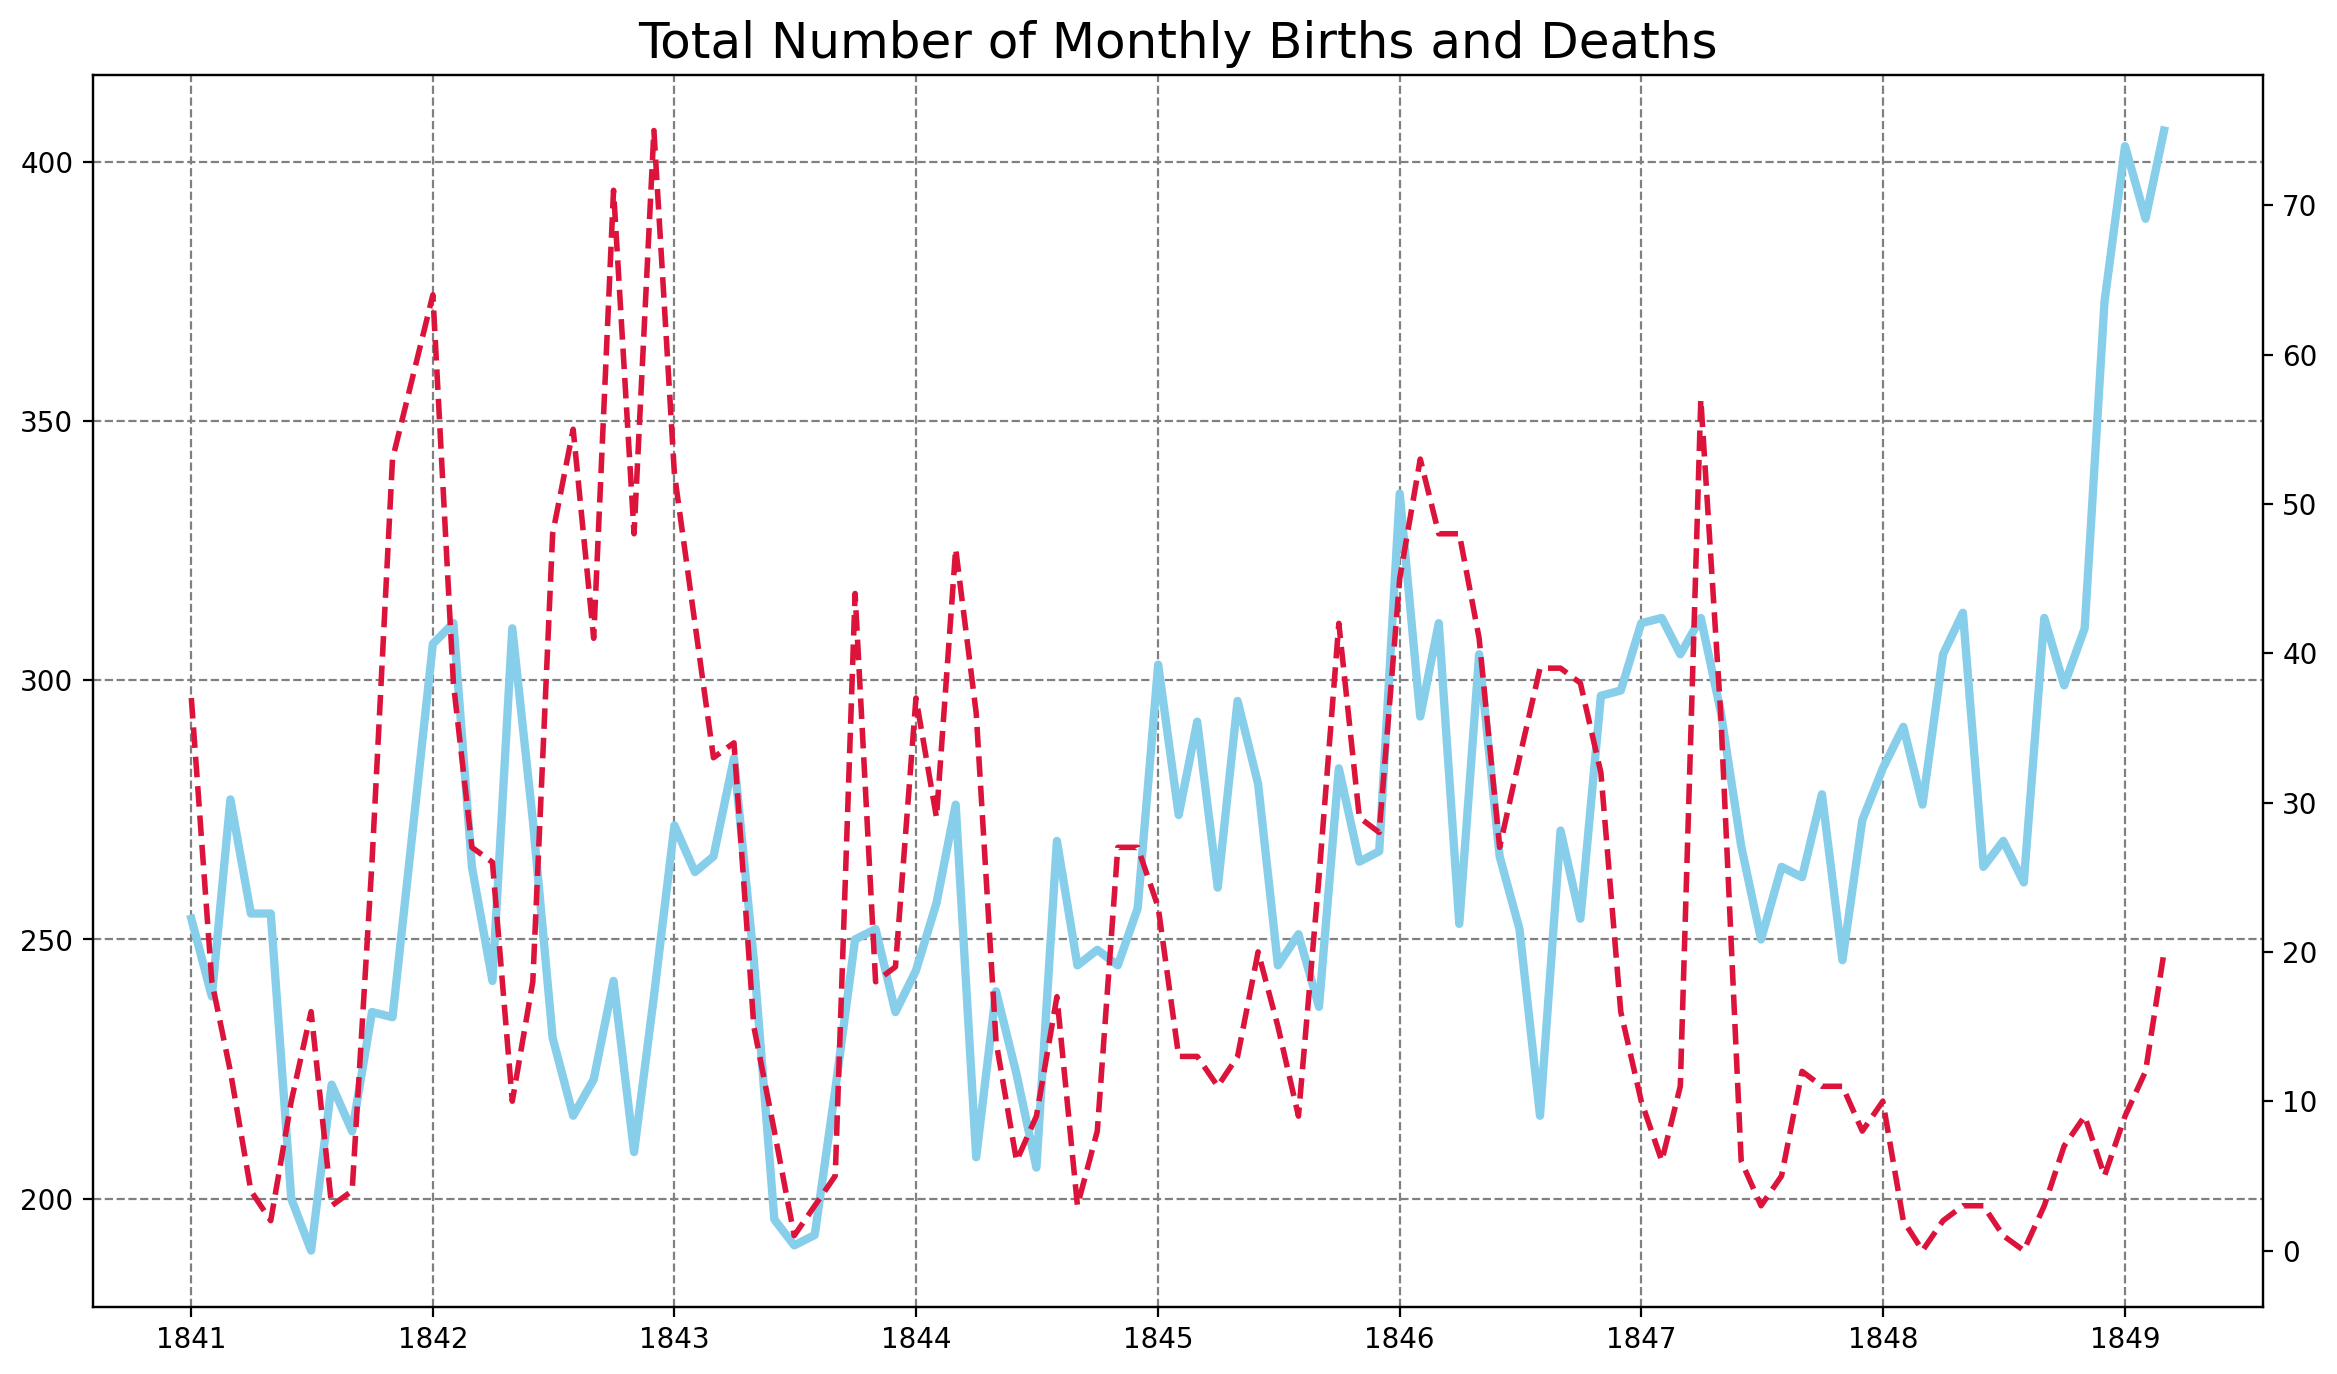

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

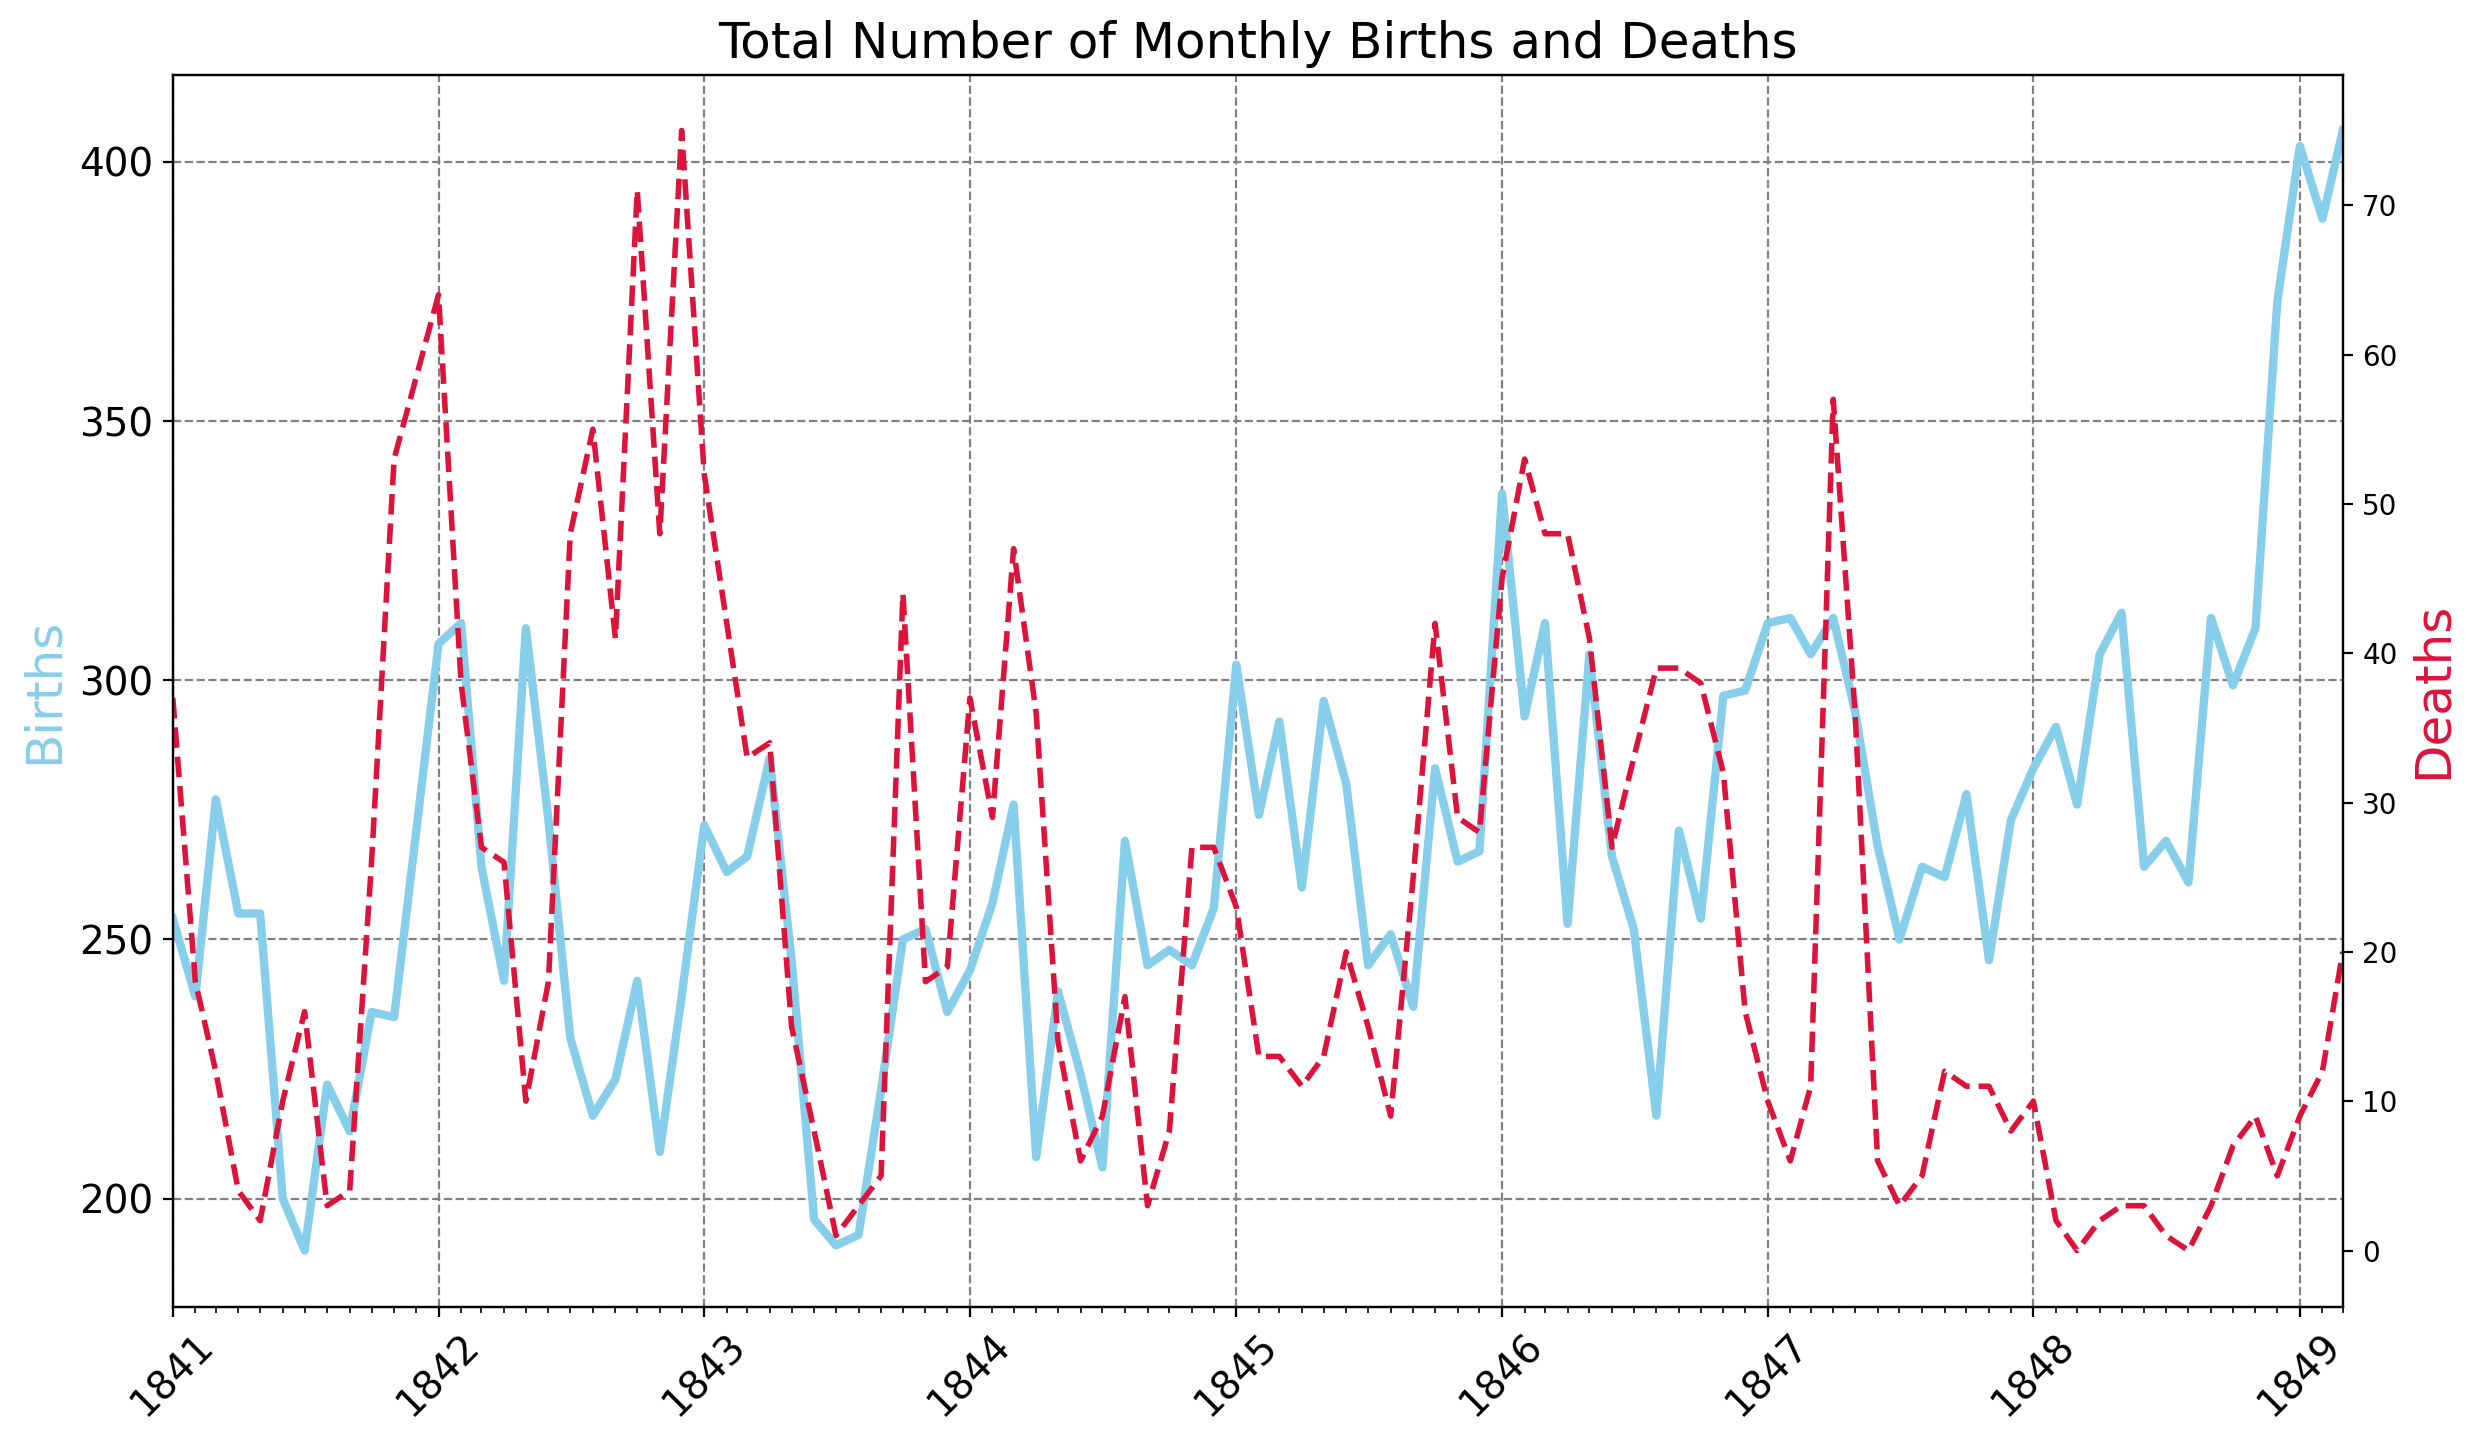

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

# Use Locators
ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3)

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--')

plt.show()


# The Yearly Data Split by Clinic

In [ ]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Total Yearly Births by Clinic')

line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [ ]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths by Clinic')

line.show()

### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
df_yearly['pct_deaths'] = (df_yearly['deaths'] / (df_yearly['deaths'] + df_yearly['births'])) * 100
df_yearly.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.24
1,1842,3287,518,clinic 1,13.61
2,1843,3060,274,clinic 1,8.22
3,1844,3157,260,clinic 1,7.61
4,1845,3492,241,clinic 1,6.46


In [ ]:
#The average death rate for the entire time period for clinic 1 is:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / (clinic_1.deaths.sum() + clinic_1.births.sum()) * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

#The average death rate for the entire time period for clinic 2 is:
clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / (clinic_2.deaths.sum() + clinic_2.births.sum()) * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 1 is 9.03%.
Average death rate in clinic 2 is 3.74%.


In [ ]:
line = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color='clinic',
               title='Propotion of Yearly Deaths by Clinic')

line.show()

# The Effect of Handwashing

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

In [ ]:
df_monthly['pct_deaths'] = df_monthly.deaths/(df_monthly.deaths + df_monthly.births) * 100

In [ ]:
before_washing = df_monthly[df_monthly.date < handwashing_start]
after_washing = df_monthly[df_monthly.date >= handwashing_start]

In [ ]:
bw_rate = before_washing.deaths.sum() / (before_washing.deaths.sum() + before_washing.births.sum()) * 100
aw_rate = after_washing.deaths.sum() / (after_washing.deaths.sum() + after_washing.births.sum()) * 100
print(f'Average death rate before 1847 was {bw_rate:.3}%')
print(f'Average death rate AFTER 1847 was {aw_rate:.3}%')

Average death rate before 1847 was 9.52%
Average death rate AFTER 1847 was 2.11%


### Calculate a Rolling Average of the Death Rate

In [ ]:
roll_df = before_washing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

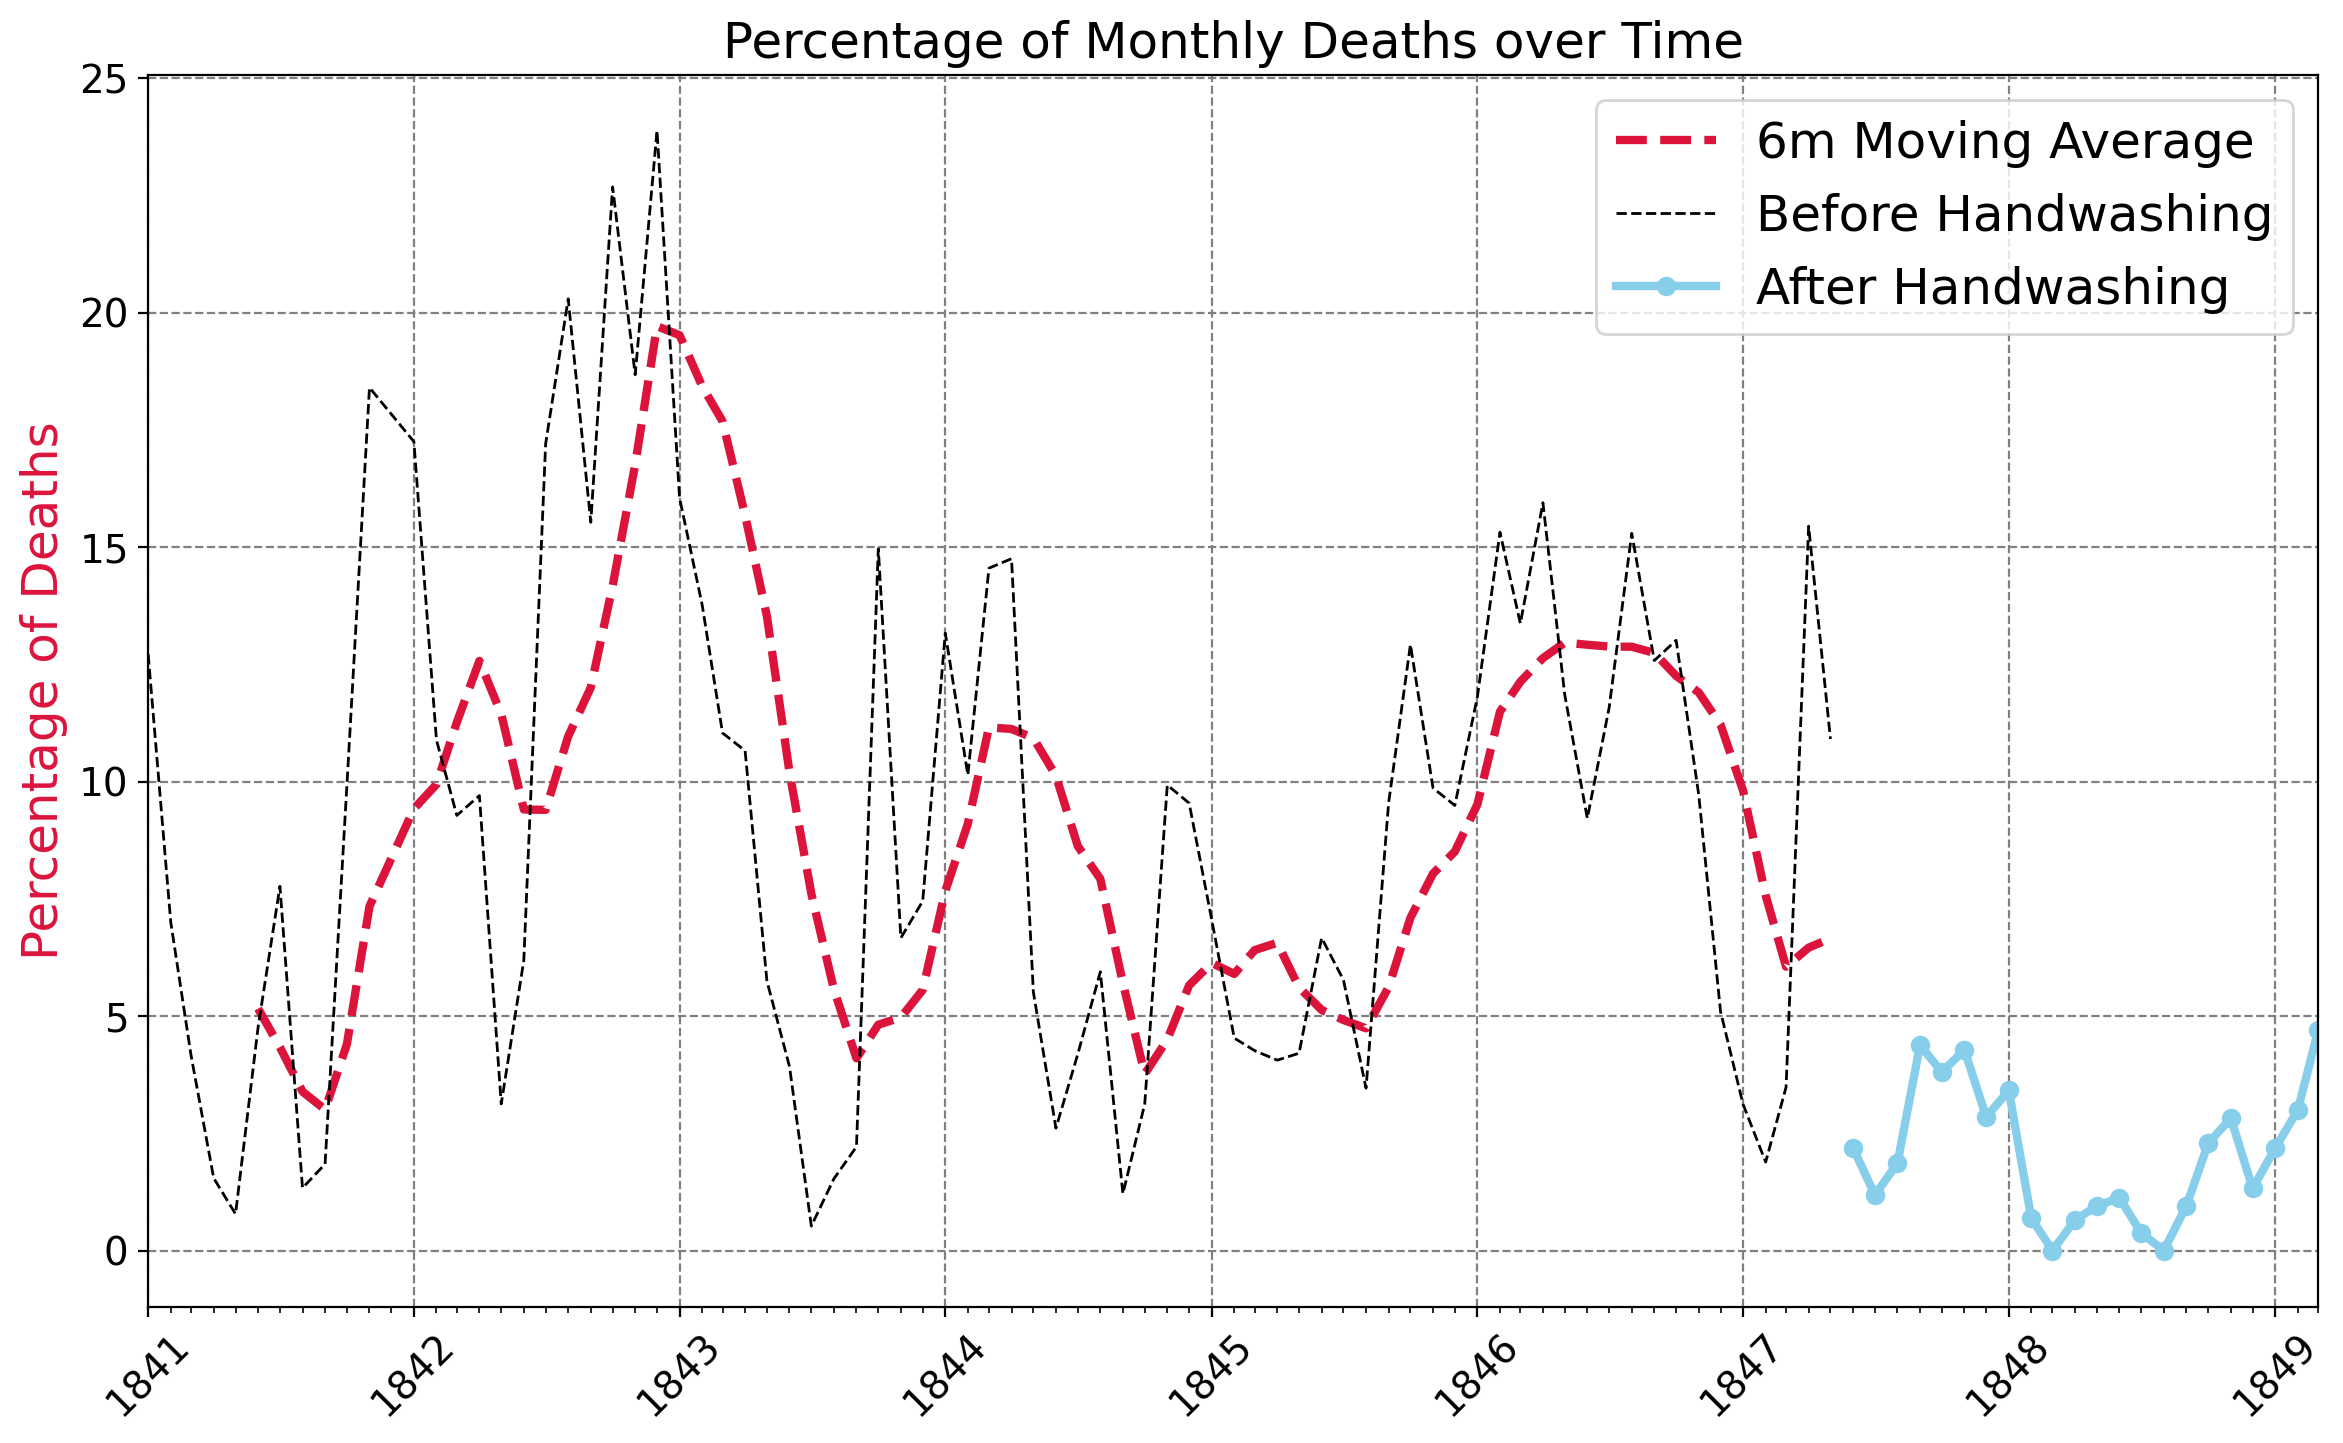

In [ ]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

plt.grid(color='grey', linestyle='--')

ma_line, = plt.plot(roll_df.index,
                    roll_df.pct_deaths,
                    color='crimson',
                    linewidth=3,
                    linestyle='--',
                    label='6m Moving Average')

bw_line, = plt.plot(before_washing.date,
                    before_washing.pct_deaths,
                    color='black',
                    linewidth=1,
                    linestyle='--',
                    label='Before Handwashing')

aw_line, = plt.plot(after_washing.date,
                    after_washing.pct_deaths,
                    color='skyblue',
                    linewidth=3,
                    marker='o',
                    label='After Handwashing')

plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

In [ ]:
avg_prob_before = before_washing.pct_deaths.mean()
print(f'Chance of death during childbirth before handwashing: {avg_prob_before:.3}%.')

Chance of death during childbirth before handwashing: 9.15%.


In [ ]:
avg_prob_after = after_washing.pct_deaths.mean()
print(f'Chance of death during childbirth AFTER handwashing: {avg_prob_after:.3}%.')

Chance of death during childbirth AFTER handwashing: 2.05%.


In [ ]:
mean_diff = avg_prob_before - avg_prob_after
print(f'Handwashing reduced the monthly proportion of deaths by {mean_diff:.3}%!')

Handwashing reduced the monthly proportion of deaths by 7.11%!


In [ ]:
times = avg_prob_before / avg_prob_after
print(f'This is a {times:.2}x improvement!')

This is a 4.5x improvement!


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [ ]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [ ]:
box = px.box(df_monthly,
             x='washing_hands',
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths',)

box.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

In [ ]:
fig = px.histogram(df_monthly,
                   x="pct_deaths",
                   histnorm='percent',
                   color='washing_hands',
                   opacity=0.6,
                   nbins=30,
                   barmode='overlay',
                   marginal='box')

fig.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count')

fig.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution


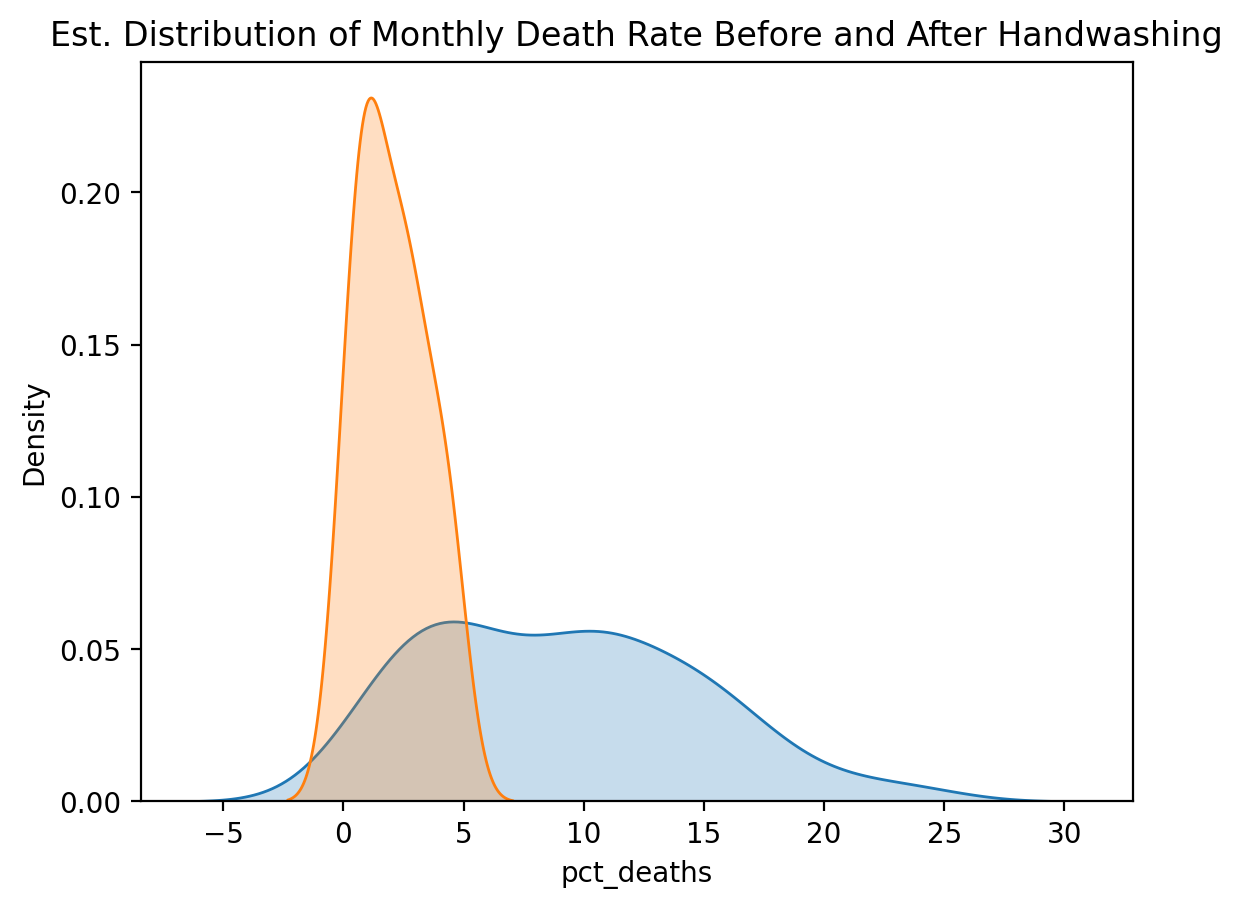

In [ ]:
plt.figure(dpi=200)
# By default the distribution estimate includes a negative death rate!
sns.kdeplot(before_washing.pct_deaths, fill=True)
sns.kdeplot(after_washing.pct_deaths, fill=True)
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.show()

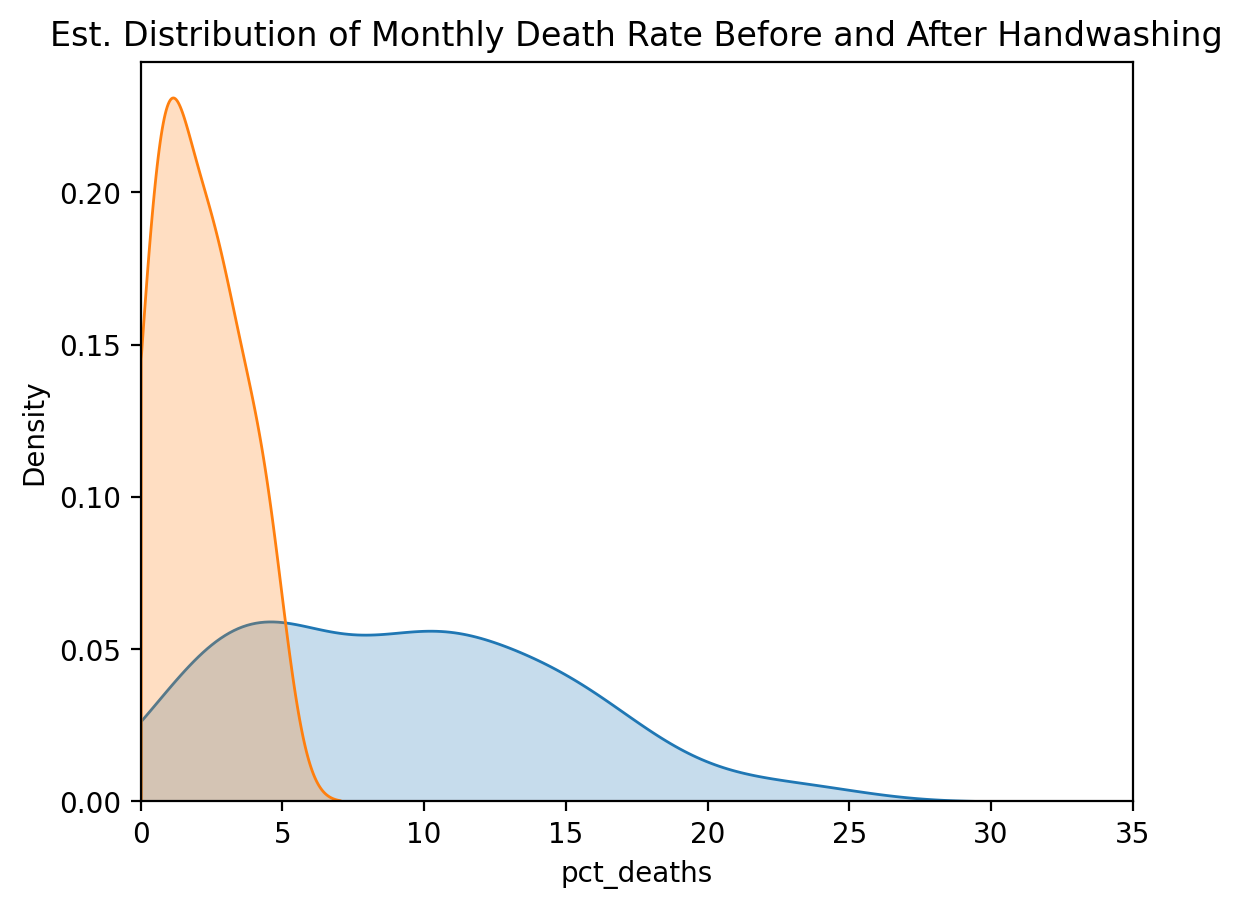

In [ ]:
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths,
            fill=True,
            clip=(0,50))
sns.kdeplot(after_washing.pct_deaths,
            fill=True,
            clip=(0,10))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 35)
plt.show()

### Use a T-Test to Show Statistical Significance



In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stat, p_value = ttest_ind(a=before_washing.pct_deaths,
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000000651
t-statstic is 5.86
